<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_06_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 차원 축소
### 01 차원 축소(Dimension Reduction) 개요


차원 축소 대표적인 알고리즘인 PCA, LDA, SVD, NMF에 대해 알아보겠음.  

차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.

### 주성분분석 PCA (Principal Component Analysis)
여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법

In [39]:
# 붓꽃(Iris) 데이터 세트는 sepal length, sepal width, petal length, petal width 4개의 속성으로 되어 있음
# 이 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인해 보겠음
from sklearn.datasets import load_iris
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

iris = load_iris()
# numpy 데이터 세트를 판다스 DF로 변환
# columns = iris.feature_names   # 이것과 아래 columns 는 같다.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


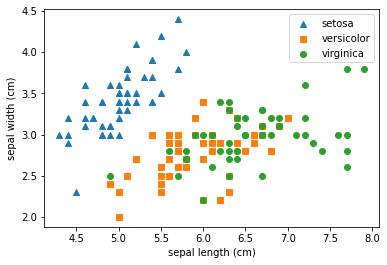

In [40]:
# 각 붓꽃 데이터 세트가 어떻게 분포되어 있는지 2차원으로 시각화
# setosa=세모, versicolor=네모 , virginica=동그라미
markers = ['^', 's', 'o']

# setosa 의 target 값은 0, versicolor은 1, virginica는 2, 각 타겟별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisdf[irisdf['target']==i][iris.feature_names[0]]
    y_axis_data = irisdf[irisdf['target']==i][iris.feature_names[1]]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Setosa 품종의 경우 sepal width 가 3.0 보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포되어 있음.  
Versicolor 와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있음.  

이제 PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화 해 보겠음

&nbsp;  
여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변화하는 작업 필요.  
sklearn 의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환하겠음.


In [41]:
from sklearn.preprocessing import StandardScaler

# target 값을 제외한 모든 속성값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisdf.iloc[:, :-1])

스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA속성) PCA 데이터로 변환해 보겠음  
**n_components**는 PCA로 변환할 차원의 수를 의미

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

print('Shape before PCA:', iris_scaled.shape)
# fit() 과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print('Shape after PCA:', iris_pca.shape)

Shape before PCA: (150, 4)
Shape after PCA: (150, 2)


In [43]:
# iris_pca 데이터는 150 * 2 넘파이 행렬로 가지고 있음. 이를 DF 로 변환
# PCA 변환된 데이터는 칼럼 명을 각각 pca_component_1, pca_component_2 로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisdf_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisdf_pca['target'] = iris.target
irisdf_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


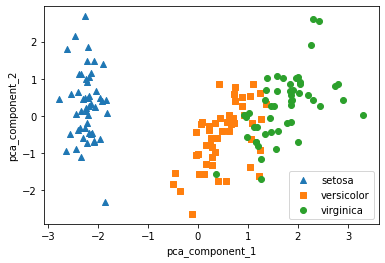

In [44]:
# 2개의 속성으로 PCA 변환된 데이터를 2차원 상에서 시각화 하겠음

# setosa=세모, versicolor=네모, virginica=동그라미
markers=['^', 's', 'o']

# pca_component_1 속성을 x축, pca_component_2 속성을 y 축
for i, marker in enumerate(markers) :
    x_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_1']
    y_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보겠음.  
PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서  
개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공하고 있음

In [45]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


**pca_component_1**이 전체 변동성의 72.9%, 두번째 pca_component_2가 약 22.8%를 차지함.  
따라서 PCA를 2개 요소로만 변환해도 원본 데이터 변동성을 95% 설명할 수 있음.


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [47]:
pca_x = irisdf_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rf, pca_x, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


### Credit Card Clients Data Set

[CreditCardClientsDataSet_URL](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)  
위 링크 접속 후 **Data Folder > default_of_credit_card_clients.xlsx** 클릭  


피처 설명
- default payment next month : target 값으로 다음달 연체 여부를 의미. '연체'일 경우 1, '정상납부'가 0입니다.

In [48]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/credit-card-clients-data-set/default of credit card clients.xls')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [49]:
# header 첫행 제거, iloc로 기존 id 제거
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/credit-card-clients-data-set/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:, 1:]
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [50]:
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [51]:
#p.389, 101

피처 중 **PAY_0** 다음에 **PAY_2** 컬럼이 있으므로 PAY_0 을 PAY_1로 변경.  
default payment next month 컬럼도 컬럼명이 너무 길어 'default'로 변경.

In [52]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
x_features = df.drop('default', axis=1)

해당 데이터 세트는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높음.  
DF의 **corr()**을 이용해 각 속성 간의 상관도를 구한 뒤 이를 seaborn의 heatmap으로 시각화하겠음.

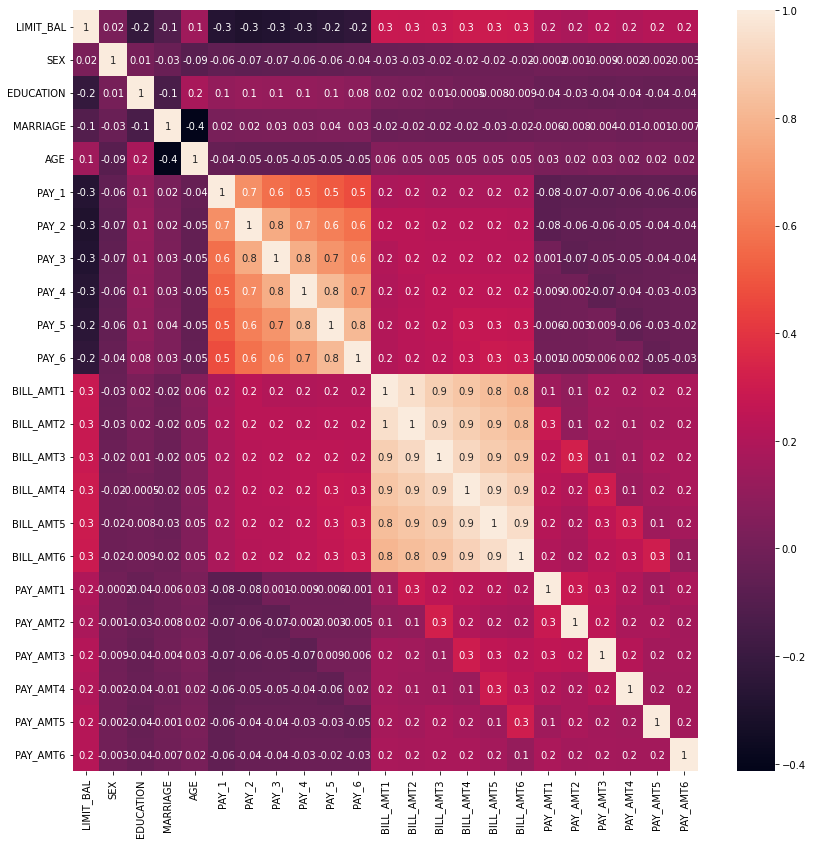

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = x_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- PAY_1 ~ PAY_6 까지의 속성 역시 상관도가 높음

BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보겠음.

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(x_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA component 별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA component 별 변동성: [0.90555253 0.0509867 ]


2개의 PCA 컴포넌트 만으로 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며, 특히 첫 번째 PCA축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높음.    
&nbsp;  
이번에는 원본 데이터 세트 6개와, PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교해 보겠음.

In [55]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rf, x_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우 개별 fold 세트 별 정확도:', scores)
print('평균 정확도:{:.4f}'.format(np.mean(scores)))

CV=3 인 경우 개별 fold 세트 별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우 PCA 변환된 개별 fold 세트 별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:{:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우 PCA 변환된 개별 fold 세트 별 정확도: [0.7912 0.797  0.8046]
PCA 변환 데이터 평균 정확도:0.7976


### LDA (Linear Discriminant Analysis) 선형 판별 분석
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- PCA와의 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소합니다.
- PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- 즉, 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식임.  

아래 그림은 좋은 클래스 분리를 위해 클래스 간 분산이 크고 클래스 내부 분산이 작은 것을 표현  
(출처 : 파이썬 머신 러닝 완벽 가이드 책)


![lda-desc](https://user-images.githubusercontent.com/291782/141725158-1a5f4a3c-1f90-4ba8-98da-14ed1a0a3ca3.png)

#### 붓꽃 데이터 세트에 LDA 적용하기

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
print('Shape before LDA:', iris_scaled.shape)

Shape before LDA: (150, 4)


**주의사항**  
LDA는 PCA와 다르게 비지도 학습이 아닌 지도학습이라는 점.  
즉, 클래스의 결정 값이 변환시에 필요함. 다음 lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음에 유의해야 함.

In [58]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # iris.target 이 fit()에 들어감
iris_lda =  lda.transform(iris_scaled)
print('shape after LDA:', iris_lda.shape)

shape after LDA: (150, 2)


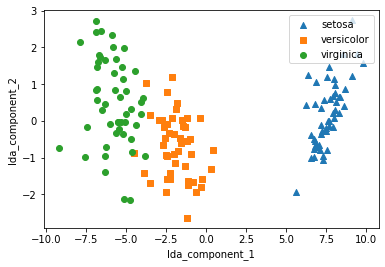

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisdf_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisdf_lda['target'] = iris.target

# setosa=세모, versicolor=네모, virginica=동그라미
markers = ['^', 's', 'o']

# setosa 의 target 값은 0, versicolor = 1, virginica = 2. 각 target 값 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisdf_lda[irisdf_lda['target'] == i]['lda_component_1']
    y_axis_data = irisdf_lda[irisdf_lda['target'] == i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### SVD (Singular Value Decomposition) 특이값 분해
- PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있음.
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음.  

&nbsp;  
일반적으로 SVD는 m X n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미함  
$A = U \displaystyle \sum V^t$

SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터(Singular Vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐.  
$\displaystyle \sum$ 는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0 입니다.



In [60]:
# numpy의 svn 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


SVD 분해는 numpy.linalg.svd 에 파라미터로 원본 행렬을 입력하면 U행렬, Sigma 행렬, V 전치 행렬을 반환함.  
Sigma 행렬의 경우, A=U$\sum$V^t 에서 $\sum$ 행렬을 나타내며, $\sum$ 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고,  
그렇지 않은 모든 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현함.

In [61]:
U, sigma, Vt = svd(a)
print(U.shape, sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('\nsigma value:\n', np.round(sigma, 3))
print('\nV transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

sigma value:
 [3.423 2.023 0.463 0.079]

V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 보겠음.  
원본 행렬로의 복원은 이 U, Sigma, Vt를 내적하면 됨.  
한간지 유의할 점은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변한환 뒤에 내적을 수행해야 함.

In [62]:
# np.diag() 대각행렬 생성 (나머지는 다 0으로 채워짐)
print('np.diag():\n', np.diag(np.arange(1, 5)))

a_array = [1, 2, 3]
b_array = [2, 3, 4]
# np.dot(aArray,bArray)  a array 와 b array를 모두 곱한 후 더한다.
print('\nnp.dot():\n', np.dot(a_array, b_array))  # 1*2 + 2*3 + 3*4 = 20

np.diag():
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

np.dot():
 20


In [63]:
# Sigma 를 다시 0을 포함한 대칭행렬로 변환
sigma_mat = np.diag(sigma)    
a_ = np.dot(np.dot(U, sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


위와 같이 U, Sigma, Vt를 이용해 a_ 는 원본 행렬 a와 동일하게 복원됨을 알 수 있음.  
&nbsp;  
이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보겠음.  
일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫번째 로우 + 두번째 로우' 로 업데이트 하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트 하겠음.

In [64]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a))

[[-0. -0. -1. -0.]
 [-0.  1.  2.  0.]
 [-1.  1.  1. -0.]
 [-0. -0. -1. -0.]]


In [65]:
# 다시 SVD를 수행해 Sigma 값 확인
U, sigma, Vt = svd(a)
print(U.shape, sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했음. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미임.  
(즉, 행렬의 랭크(Rank)가 2임)  


다시 원본 행렬로 복원

In [68]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
sigma_ = np.diag(sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, sigma_.shape, Vt_.shape)

# U, sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD를 이용해 행렬 분해  
Truncated SVD 는 사이파이(scipy)에서만 지원.

In [69]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우, U, sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, sigma, vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, sigma.shape, vt.shape)
print('\nSigma 값 행렬:', sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, sigma_tr, vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, sigma_tr.shape, vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(sigma_tr)), vt_tr) # output of Truncated SVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)
# 완벽하게 복원되지는 않고 근접하게 복원됨을 알 수 있다.

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7267323

#### 사이킷런 Truncated SVD 클래스를 이용한 변화

Text(0, 0.5, 'TruncatedSVD component 2')

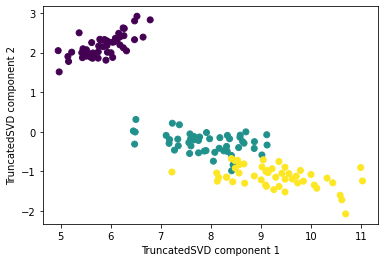

In [70]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD component 1')
plt.ylabel('TruncatedSVD component 2')

Text(0.5, 1.0, 'PCA Transformed')

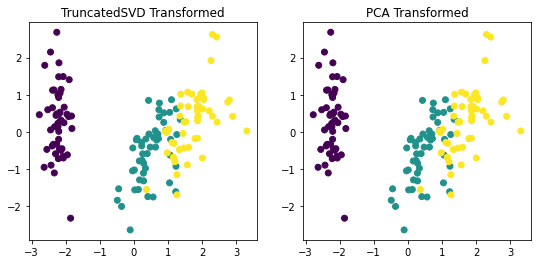

In [71]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler 로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽, PCA 를 오른쪽
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('TruncatedSVD Transformed')
ax2.set_title('PCA Transformed')

In [72]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())


2.339760329927998e-15
4.85722573273506e-17


모두 0에 가까운 값이므로 2개의 변환이 동일함을 알 수 있음.  
즉, 데이터가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행함.

이는 PCA가 SVD 알고리즘으로 구현됐음을 의미함.  
&nbsp;  
하지만, PCA는 밀집행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소행렬(Sparse Matrix)에 대한 변환도 가능함.

### NMF (Non-Negative Matrix Factorization)
NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형임.  
NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게  
두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭함.


![nmf](https://user-images.githubusercontent.com/291782/142009274-41ff301f-a77b-4cc5-9b51-3aad6e3e7804.png)

4 X 6 원본행렬 V는 4 X 2 행렬 W와 2 X 6 행렬 H로 근사해 분해될 수 있음.  
행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W  
(즉, 원본 행렬의 행 크기와 같고 열 크기 보다 작은 행렬)와 작고 넓은 행렬 H  
(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해 됨.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'NMF Component 2')

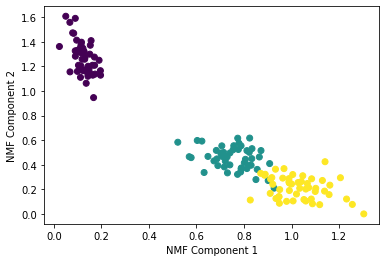

In [74]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()